Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.  
Данные вы сможете получить исполнив следующий код:  
```python
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
```
Переменная, которую надо предсказать - ’MEDV’.  
Прочитать информацию о содержимом датасета:  
```python
print(load_boston()[‘DESCR’])
```
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.  
Цель задания - закрепить полученные навыки.  


In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(load_boston()["filename"], skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Описание:  

- CRIM - уровень преступности на душу населения по городам
- ZN  - доля земли под жилую застройку зонирована на участки площадью более 25 000 кв. Футов.
- INDUS - пропорция, не относящихся к розничной торговле, на город
- CHAS - фиктивная переменная Charles River (= 1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота NOX (частей на 10 миллионов)
- RM - среднее количество комнат в доме в РМ
- AGE - доля домов, занимаемых владельцами, построенных до 1940 г.
- DIS - взвешенные расстояния до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог РАД
- TAX - ставка налога на имущество в размере полной стоимости за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей PTRATIO по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля черных по городам
- LSTAT - % более низкого статуса населения  

- MEDV - средняя стоимость частных домов в 1000 долларов

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Как видим, пропусков нет, обработка пропусков не требуется.

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


По каждому параметру из представленных данных видно, что минимальные и максимальные значения лежат в допустимых пределах. Значит, что-то отбрасывать не понадобится.  
Посмотрим визуально есть ли какие-то корреляции между параметрами.

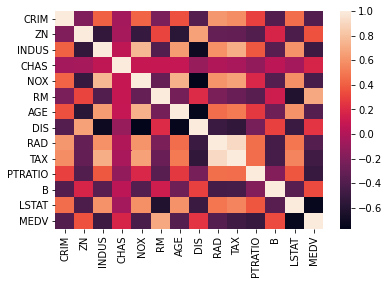

In [5]:
sns.heatmap(data.corr());

Выделяется корреляция между TAX и RAD. Это корреляция между ставкой налога и доступностью дорог. Остальное как-то сложно анализировать визуально, составим отсортированный список коррелируемых параметров.

In [6]:
corr = data.corr()
arr = corr.to_numpy()
vals = []
for i in range(arr.shape[0]):
    for j in range(i):
        vals.append((corr.index[i], corr.columns[j], arr[i][j]))
corrs = pd.DataFrame(sorted(vals, key=lambda x: abs(x[2]), reverse=True), columns=["par1", "par2", "corr"])
corrs.head(10)

,par1,par2,corr
0,TAX,RAD,0.910228
1,DIS,NOX,-0.769230
2,NOX,INDUS,0.763651
3,DIS,AGE,-0.747881
4,MEDV,LSTAT,-0.737663
5,AGE,NOX,0.731470
6,TAX,INDUS,0.720760
7,DIS,INDUS,-0.708027
8,MEDV,RM,0.695360
9,TAX,NOX,0.668023


Как и на heatmap выделяется пара параметров: TAX, RAD (что неудивительно).  
По остальным параметрам корреляция меньше.  
Посмотрим еще на корреляцию параметров с целевым.

In [7]:
corrs[corrs["par1"] == "MEDV"]

,par1,par2,corr
4,MEDV,LSTAT,-0.737663
8,MEDV,RM,0.695360
25,MEDV,PTRATIO,-0.507787
30,MEDV,INDUS,-0.483725
31,MEDV,TAX,-0.468536
38,MEDV,NOX,-0.427321
44,MEDV,CRIM,-0.388305
47,MEDV,RAD,-0.381626
50,MEDV,AGE,-0.376955
53,MEDV,ZN,0.360445


Наибольшая корреляция MEDV с параметрами LSTAT (процент низкого статуса населения), RM (среднее кол-во комнат).

Построим линейную регрессию и посчитаем качество.

In [8]:
def get_model_info(data_X, data_Y):
    X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, Y_train);
    accur = model.score(X_train, Y_train)
    print(f"Качество модели на тренировочных данных: {accur}.")
    accur = model.score(X_test, Y_test)
    print(f"Качество модели на тестовых данных: {accur}.")
    return model.coef_

X_src = data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
Y_src = data["MEDV"]
coeffs = get_model_info(X_src, Y_src)

Качество модели на тренировочных данных: 0.7434997532004697.
Качество модели на тестовых данных: 0.711226005748496.


Отбросим по очереди один из сильно скоррелированных параметров, и снова построим модель. 

In [9]:
X = data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT"]] # без RAD
Y = data["MEDV"]
get_model_info(X, Y);

Качество модели на тренировочных данных: 0.7368776364334096.
Качество модели на тестовых данных: 0.6883010754490897.


In [10]:
X = data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","PTRATIO","B","LSTAT"]] # без TAX
Y = data["MEDV"]
get_model_info(X, Y);

Качество модели на тренировочных данных: 0.7408167656753205.
Качество модели на тестовых данных: 0.6983850039833572.


Как видим, лучше не стало.  
Попробуем теперь изменить исходный набор так, чтобы в него входили наиболее скорретированные с результатом параметры.

In [11]:
X = data[["RM","LSTAT"]]
Y = data["MEDV"]
get_model_info(X, Y);

Качество модели на тренировочных данных: 0.6486379416291156.
Качество модели на тестовых данных: 0.5998518447715597.


И снова нет изменений в лучшую сторону.

Посмотрим какие параметры больше всего влияют на исходную модель.

In [12]:
params = []
for i in range(X_src.shape[1]):
    params.append([X_src.columns[i], coeffs[i]])
pd.DataFrame(sorted(params, key=lambda x: abs(x[1]), reverse=True), columns=["Параметр", "Коэффициент"])

,Параметр,Коэффициент
0,NOX,-15.417061
1,RM,4.057199
2,CHAS,3.119835
3,DIS,-1.385998
4,PTRATIO,-0.910685
5,LSTAT,-0.547113
6,RAD,0.242727
7,CRIM,-0.133470
8,INDUS,0.049523
9,ZN,0.035809


Примем во внимание наиболее влияющие параметры исходной модели, сделаем выбор так, чтобы в набор также входили наиболее скоррелированные с результатом переменные и отбросим остальные.

In [13]:
X = data[["CHAS","NOX","RM","DIS","PTRATIO","LSTAT"]]
Y = data["MEDV"]
get_model_info(X, Y);

Качество модели на тренировочных данных: 0.7201498372255456.
Качество модели на тестовых данных: 0.693388302224337.


К сожалению, улучшить качество модели не удалось.